# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Data

In [2]:
boston_data = load_boston()
df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df_boston['Price'] = boston_data.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# keep the RM and Price data
X = np.array(df_boston['RM']).reshape(-1,1)
y = np.array(df_boston['Price']).reshape(-1,1)

# EDA

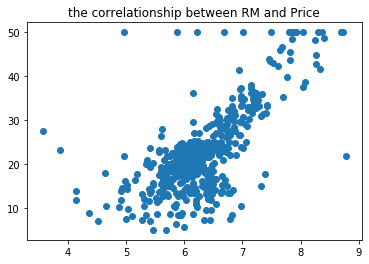

In [4]:
# the correlationship between RM and Price
plt.scatter(X, y)
plt.title('the correlationship between RM and Price');

# Data Preprocess

# Outliers

## Data split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Normalization

# Model

## Training

In [6]:
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)
# predict
y_pred = lr.predict(X_test)

## Evaluation

In [7]:
# the evaluatino function
def linear_evaluation(y_test, y_pred):
    result = []
    result.append({
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    })
    df_result = pd.DataFrame(result, columns=['R2','MSE'])
    return df_result

In [8]:
linear_evaluation(y_test, y_pred)

,R2,MSE
0,0.423944,46.907352


## Visualization

In [9]:
# the regression plot
X_prime = np.linspace(X.min(), X.max(), 100)
y_hat=lr.predict(X_prime.reshape(-1,1))

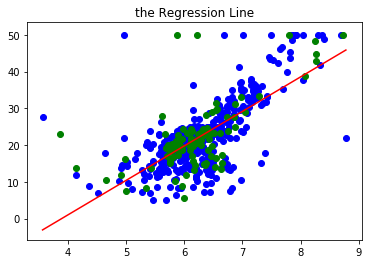

In [10]:
# the scatter of X and y
plt.scatter(X_train, y_train, color='b')
plt.scatter(X_test, y_test, color='g')
# the regression line
plt.plot(X_prime, y_hat, color='r')

plt.title('the Regression Line');

# Building Model with Statsmodels

In [11]:
import statsmodels.api as sm

In [12]:
X = df_boston['RM']
y = df_boston['Price']

## Training

In [13]:
# adding a constant
X = sm.add_constant(X)

# use OLS objec's fit() meathod to fit
est = sm.OLS(y, X)
model = est.fit()

#predict
y_hat = model.predict(X)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Display results

In [14]:
# display the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           2.49e-74
Time:                        23:14:03   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Adj. R-squared：俗称 R平方。反映了模型的拟合。R平方值的范围从 0 到 1，其中较高的值通常表示更好的拟合，假设满足某些条件；
- const coef：这个系数是你的 Y 截距。
- std err：反映了系数的准确度，它越低，准确度越高；
- P>|t|：这是 p 值，p 值小于 0.05 被认为是统计学上显著的；
- Confidence Interval：这是置信区间，表示我们的系数可能下降的范围（可能性为 95%）

## Params

In [15]:
# display the model params
model.params

const   -34.670621
RM        9.102109
dtype: float64

## Visualization

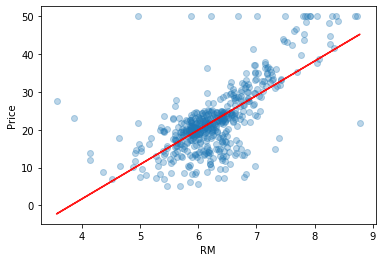

In [16]:
# plot
plt.scatter(X['RM'], y, alpha=0.3) # the original data
plt.plot(X['RM'], y_hat, 'r', alpha=0.9) # the regression line

plt.xlabel("RM")
plt.ylabel("Price");